# <center> LESSON 9: CASE STUDY with CREDIT SCORING </center>

## 1. PROBLEM

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

- **Input**: Historical data of 250,000 borrowers.
- **Output**: SeriousDlqin2yrs.
- **Goal**: Build a model that borrowers can use to help make the best financial decisions.

Reference: [Kaggle Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

## 2. Exploratory Data Analysis (EDA)

### 2.1 Variables descriptions

|Variables|Descriptions|
|-|-|
|**SeriousDlqin2yrs**| Person experienced 90 days past due delinquency or worse|
|**RevolvingUtilizationOfUnsecuredLines**| Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits|
|**age**| Age of borrower in years|
|**NumberOfTime30-59DaysPastDueNotWorse**| Number of times borrower has been 30-59 days past due but no worse in the last 2 years||
|**DebtRatio**| Monthly debt payments, alimony,living costs divided by monthy gross income
|**MonthlyIncome**| Monthly income|
|**NumberOfOpenCreditLinesAndLoans**| Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)|
|**NumberOfTimes90DaysLate**| Number of times borrower has been 90 days or more past due|
|**NumberRealEstateLoansOrLines**| Number of mortgage and real estate loans including home equity lines of credit|
|**NumberOfTime60-89DaysPastDueNotWorse**| Number of times borrower has been 60-89 days past due but no worse in the last 2 years|
|**NumberOfDependents**| Number of dependents in family excluding themselves (spouse, children etc.)|

### 2.2 Statistics

**Q1: Import necessary libraries: Pandas, Numpy, Matplotlib, Seaborn**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

**Q2: Load data using pd.read_csv()**

In [5]:
df_train=pd.read_csv('cs-training.csv')
df_test=pd.read_csv('cs-test.csv')
display(df_train,df_test)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


**Q3: Get the first 5 rows of train set**

In [6]:
df_train.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


**Q4: Get number of rows and columns of  train set**

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

**Q5: Describe the distribution of train set**

In [8]:
df_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


**Q6: Get information of train set by df.info()**

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

**Q7: Get the missing percent per columns of train set**

In [13]:
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [18]:
df_train[df_train.MonthlyIncome.isnull()].head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
16,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
32,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
41,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0


In [21]:
df_train.MonthlyIncome.isnull().count()/len(df_train.MonthlyIncome)*100

100.0

In [23]:
df_train.drop(columns='MonthlyIncome')
df_test.drop(columns='MonthlyIncome')

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282653,24,0,0.068522,5,0,0,0,0.0
101499,NaN,0.922156,36,3,0.934217,8,0,2,0,4.0
101500,NaN,0.081596,70,0,836.000000,3,0,0,0,NaN
101501,NaN,0.335457,56,0,3568.000000,8,0,2,1,3.0


### 2.3 Visualization

**Q8: Target disitribution on train set via bar chart**

In [26]:
df_train.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

Text(0.5, 1.0, 'Bar chart')

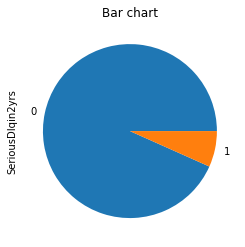

In [34]:
df_train.SeriousDlqin2yrs.value_counts().plot(kind='pie')
plt.title('Bar chart')

Text(0.5, 1.0, 'Bar chart')

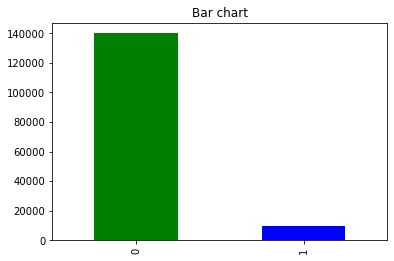

In [43]:
df_train.SeriousDlqin2yrs.value_counts().plot(kind='bar',color=['green','blue'])
plt.title('Bar chart')

**Q9: Correlation of features and target**

<AxesSubplot:>

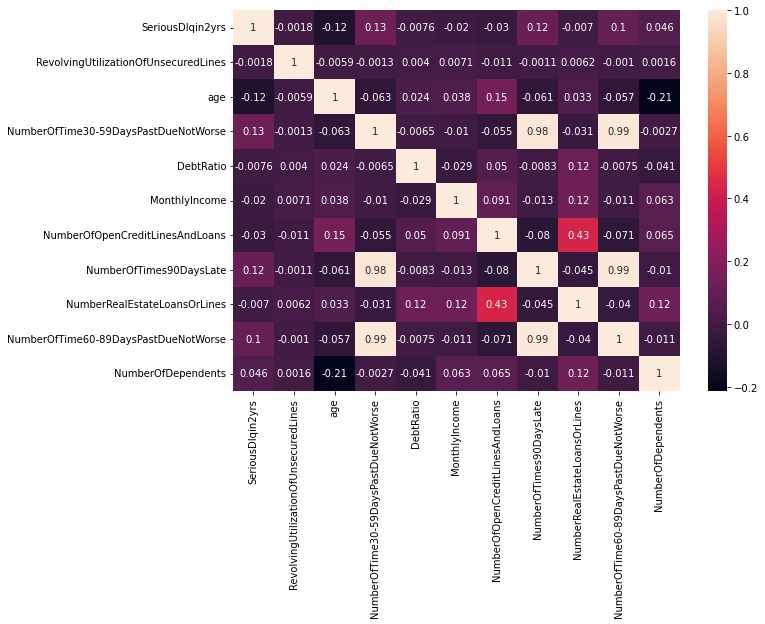

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(df_train.corr(),annot=True)

**Q10: Describe features distribution and correlation given histogram and pairplot chart**

array([[<AxesSubplot:title={'center':'SeriousDlqin2yrs'}>,
        <AxesSubplot:title={'center':'RevolvingUtilizationOfUnsecuredLines'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'NumberOfTime30-59DaysPastDueNotWorse'}>,
        <AxesSubplot:title={'center':'DebtRatio'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'NumberOfOpenCreditLinesAndLoans'}>,
        <AxesSubplot:title={'center':'NumberOfTimes90DaysLate'}>,
        <AxesSubplot:title={'center':'NumberRealEstateLoansOrLines'}>],
       [<AxesSubplot:title={'center':'NumberOfTime60-89DaysPastDueNotWorse'}>,
        <AxesSubplot:title={'center':'NumberOfDependents'}>,
        <AxesSubplot:>]], dtype=object)

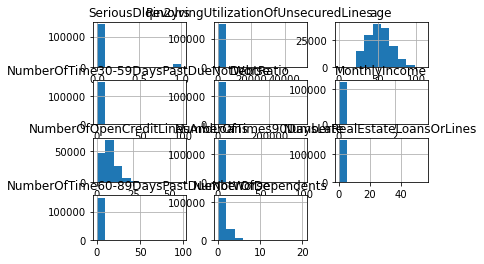

In [56]:
%matplotlib inline
df_train.hist()

**Q11: Explore each feature with target**

In [68]:
features=df_train.columns.to_list()

In [70]:
features.remove('SeriousDlqin2yrs')

In [71]:
features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

## 3. MODEL

**Q12: Handle outliers in dataset**

In [73]:
from collections import Counter
def detect_outliers(df, n, features):
    """
    Input:
    df: DataFrame
    features: list containing column names
    """
    outlier_indices = []
    #Step1: iterate over features(columns)
    for col in features:
        # Step 2: Calculate 1st quantile (25%)
        Q1 = np.percentile(df[col], 25)
        # Step 3: Calculate 3rd quantile (75%)
        Q3 = np.percentile(df[col], 75)
        # Step 4: Calcualte IQR = Q3-Q1
        IQR = Q3 - Q1
        # Step 5: Outlier step < Q1 - 1.5IQR, > Q3+ 1.5IQR
        outlier_step = 1.5 * IQR
        # Step 6: Determine a list of indices of outlier for features (cols)
        outlier_list_col = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].index
        # Step 7: Append [1, 2, 3], [2,3] => [1,2,3,[2,3]], extend [1,2,3,2,3]
        outlier_indices.extend(outlier_list_col)
    # Select rows containing more than n outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v > n) # Take k given v > n
    return multiple_outliers

In [72]:
features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [74]:
outliner_to_drop=detect_outliers(df_train,2,features)

In [78]:
df_train=df_train.drop(outliner_to_drop,axis=0)

<AxesSubplot:>

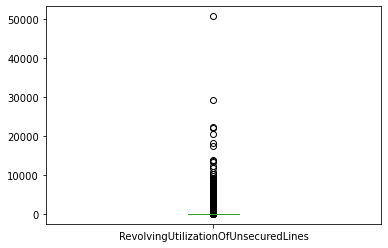

In [80]:
df_train.RevolvingUtilizationOfUnsecuredLines.plot(kind='box')

**Q13: Merge train and test dataset**

In [128]:
dataset=pd.concat([df_train,df_test],axis=0)

**Q14: Rename columns name into shorter alias**

In [84]:
dataset = dataset.rename(columns={'SeriousDlqin2yrs':'Target',
                        'RevolvingUtilizationOfUnsecuredLines':'UnsecLines',
                        'NumberOfTime30-59DaysPastDueNotWorse':'Late3059',
                        'NumberOfOpenCreditLinesAndLoans':'OpenCredit',
                        'NumberOfTimes90DaysLate': 'Late90',
                        'NumberRealEstateLoansOrLines': 'PropLines',
                        'NumberOfTime60-89DaysPastDueNotWorse':'Late60-89',
                        'NumberOfDependents':'Deps'
                       })

df_train = df_train.rename(columns={'SeriousDlqin2yrs':'Target',
                        'RevolvingUtilizationOfUnsecuredLines':'UnsecLines',
                        'NumberOfTime30-59DaysPastDueNotWorse':'Late3059',
                        'NumberOfOpenCreditLinesAndLoans':'OpenCredit',
                        'NumberOfTimes90DaysLate': 'Late90',
                        'NumberRealEstateLoansOrLines': 'PropLines',
                        'NumberOfTime60-89DaysPastDueNotWorse':'Late60-89',
                        'NumberOfDependents':'Deps'
                       })

df_test = df_test.rename(columns={'SeriousDlqin2yrs':'Target',
                        'RevolvingUtilizationOfUnsecuredLines':'UnsecLines',
                        'NumberOfTime30-59DaysPastDueNotWorse':'Late3059',
                        'NumberOfOpenCreditLinesAndLoans':'OpenCredit',
                        'NumberOfTimes90DaysLate': 'Late90',
                        'NumberRealEstateLoansOrLines': 'PropLines',
                        'NumberOfTime60-89DaysPastDueNotWorse':'Late60-89',
                        'NumberOfDependents':'Deps'
                       })

**Q15: Building binary/dummy variables**
**Hints**: Quantile data first

In [129]:
dataset.head()
dataset.columns

Index(['Target', 'UnsecLines', 'age', 'Late3059', 'DebtRatio', 'MonthlyIncome',
       'OpenCredit', 'Late90', 'PropLines', 'Late60-89', 'Deps'],
      dtype='object')

In [130]:
#fetaurevariable

In [131]:
dataset.UnsecLines=pd.qcut(dataset.UnsecLines.values,5).codes

In [132]:
dataset.UnsecLines.value_counts()

0    49597
4    49595
3    49595
2    49595
1    49594
Name: UnsecLines, dtype: int64

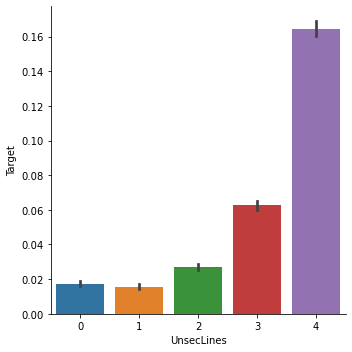

In [133]:
%matplotlib inline
sns.catplot(data = dataset, x='UnsecLines', y='Target', kind='bar');#chuyển thành categoricals

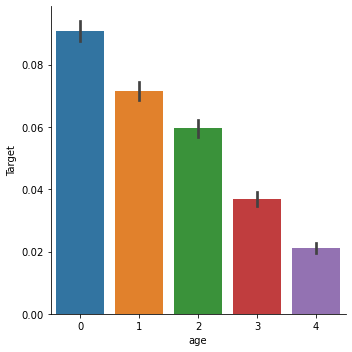

In [134]:
dataset.age=pd.qcut(dataset.age.values,5).codes
sns.catplot(data = dataset, x='age', y='Target', kind='bar');#chuyển thành categoricals

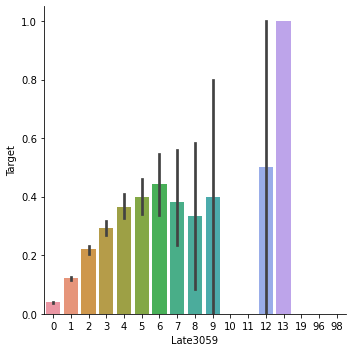

In [116]:
sns.catplot(data = dataset, x='Late3059', y='Target', kind='bar');#chuyển thành categoricals

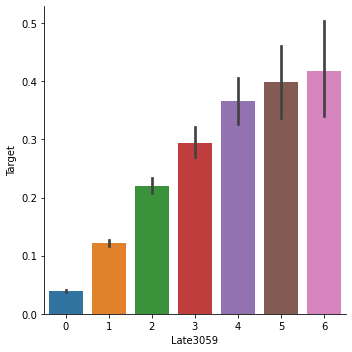

In [142]:
dataset.Late3059=[6 if x>=6 else x for x in dataset.Late3059]
sns.catplot(data = dataset, x='Late3059', y='Target', kind='bar');#chuyển thành categoricals

In [146]:
dataset.DebtRatio.value_counts()#Biến liên tục continiously variables
dataset.DebtRatio=pd.qcut(dataset.DebtRatio.values,5).codes

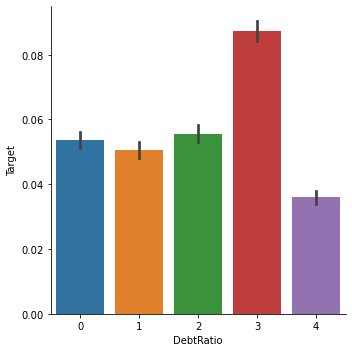

In [147]:
sns.catplot(data = dataset, x='DebtRatio', y='Target', kind='bar');#chuyển thành categoricals

In [150]:
dataset.MonthlyIncome.value_counts(dropna=False)
dataset.MonthlyIncome = dataset.MonthlyIncome.fillna(dataset.MonthlyIncome.median())

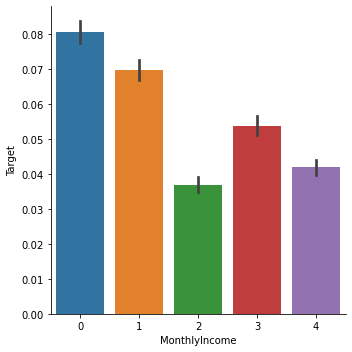

In [151]:
dataset.MonthlyIncome=pd.qcut(dataset.MonthlyIncome.values,5).codes
sns.catplot(data = dataset, x='MonthlyIncome', y='Target', kind='bar');#chuyển thành categoricals

In [154]:
dataset.Late90.value_counts(dropna=False)
#dataset.Late90.isnull().sum()

0     236629
1       7516
2       2043
3        841
4        358
98       213
5        177
6         81
7         42
8         29
9         25
10         8
11         4
13         2
17         2
12         2
16         1
15         1
96         1
18         1
Name: Late90, dtype: int64

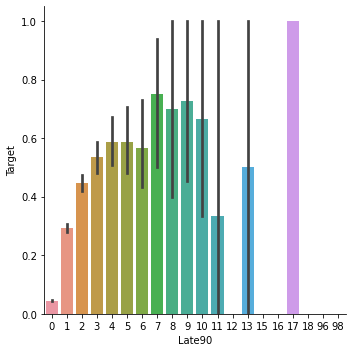

In [155]:
sns.catplot(data = dataset, x='Late90', y='Target', kind='bar');

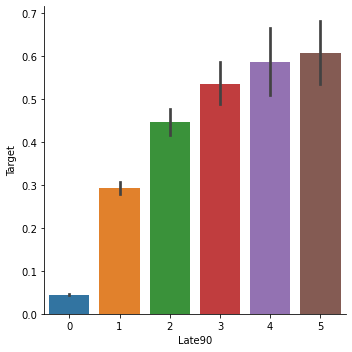

In [156]:
# dataset.Late90 = pd.qcut(dataset.Late90.values,5).codes
dataset.Late90 = [5 if x >= 5 else x for x in dataset.Late90]
sns.catplot(data = dataset, x='Late90', y='Target', kind='bar');

In [157]:
dataset['Late60-89'].value_counts(dropna=False)

0     237979
1       7963
2       1315
3        349
98       213
4         92
5         34
6         14
7         11
9          3
11         1
8          1
96         1
Name: Late60-89, dtype: int64

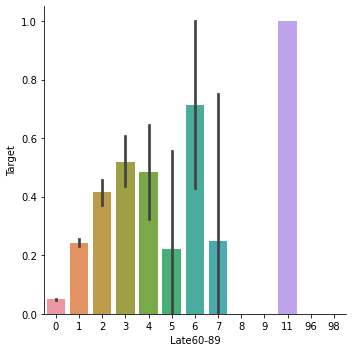

In [158]:
sns.catplot(data = dataset, x='Late60-89', y='Target', kind='bar');

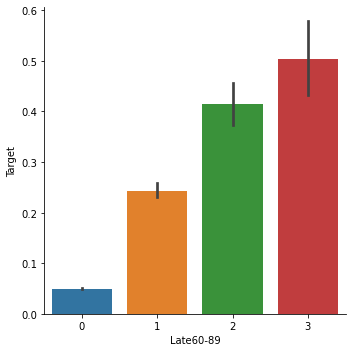

In [159]:
dataset['Late60-89'] = [3 if x >= 3 else x for x in dataset['Late60-89']]
sns.catplot(data = dataset, x='Late60-89', y='Target', kind='bar');

In [160]:
dataset.Deps.value_counts(dropna=False)

0.0     143495
1.0      43405
2.0      32367
3.0      15858
NaN       6392
4.0       4770
5.0       1253
6.0        277
7.0         99
8.0         40
10.0         8
9.0          8
20.0         2
13.0         1
43.0         1
Name: Deps, dtype: int64

In [162]:
dataset[dataset.Deps.isnull()].head()

,Target,UnsecLines,age,Late3059,DebtRatio,MonthlyIncome,OpenCredit,Late90,PropLines,Late60-89,Deps
8,0.0,2,0,0,4,2,2,0,0,0,NaN
96,0.0,3,1,2,4,2,2,0,0,0,NaN
109,0.0,1,3,0,4,2,11,0,4,0,NaN
159,0.0,0,3,0,3,2,4,0,0,0,NaN
238,0.0,4,0,0,0,2,0,0,0,0,NaN


In [163]:
dataset.Deps = dataset.Deps.fillna(dataset.Deps.median())

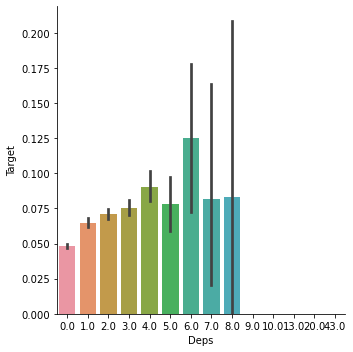

In [164]:
sns.catplot(data = dataset, x='Deps', y='Target', kind='bar');

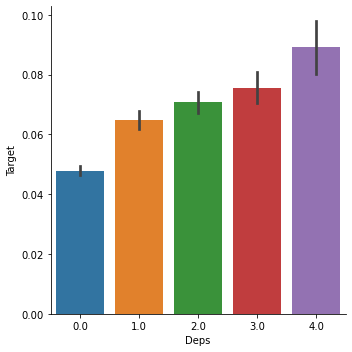

In [165]:
dataset['Deps'] = [4 if x >= 4 else x for x in dataset['Deps']]
sns.catplot(data = dataset, x='Deps', y='Target', kind='bar');

In [170]:
len(dataset.columns)

129

In [168]:
#one hot encoding

In [176]:
column_names = ['UnsecLines', 'age', 'Late3059', 'DebtRatio', 'MonthlyIncome',
       'OpenCredit', 'Late90', 'PropLines', 'Late60-89', 'Deps']
for col in column_names:
    dataset = pd.get_dummies(dataset, columns = [col], prefix=col)

In [175]:
dataset.head(5)

,Target,UnsecLines_0,UnsecLines_1,UnsecLines_2,UnsecLines_3,UnsecLines_4,age_0,age_1,age_2,age_3,...,PropLines_37,Late60-89_0,Late60-89_1,Late60-89_2,Late60-89_3,Deps_0.0,Deps_1.0,Deps_2.0,Deps_3.0,Deps_4.0
0,1.0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0.0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0.0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Q16: Train test split**

**Q17: Train prediction model using Random Forest Classifier**

**Q18: Get feature importance from classifier**

**Q19: Retrain with better parameters**

**Q20: Predict and evaluate the model performance**

<center> <img src="https://media.makeameme.org/created/have-a-nice-17d2442086.jpg" width="500"/> </center>